# Algorithms and Simulation**</font>



## <font color='orange'> **PART 1**: OPTIMIZATION</font>

For this section of the assignment, you will select one of the scenarios below and apply #optimization. You must complete all sections. [#optimization, potentially relevant: #modeling, #algorithms, #variables, #utility, #constraints]

1. *Scenario 1*: To prevent the spread of an infectious disease, a vaccine needs to be distributed as quickly and efficiently as possible to the 15 cities that have had major outbreaks. How can you optimize the route between the cities? For this scenario, you should select cities that are relevant to the disease that you will choose for PART 2. It may be helpful to include a map of these cities (either an existing map or create your own).  


2. *Scenario 2*: Suppose that a new virus is starting to spread, and many clinics do not have sophisticated diagnostic tools and must be able to determine whether or not a patient has this dangerous virus based solely on easily measured symptoms. You have been collecting information on symptoms (temperature, WBC count, headache severity, and cough severity) and you need to determine which patients have this new disease and which have only a milder illness. Plots that provide an overview of the data are available [here](https://drive.google.com/file/d/1td_jCTzYiOCMPJ8CwVSJU7u-pQ-5R1JW/view?usp=sharing). The data can be accessed at [this link](https://drive.google.com/file/d/1smz8OhVkIAbWVKpmkx7liE3bOWLfQch7/view?usp=sharing) (1 = Infected, 0 = Not infected).

#### 1.1 Optimization Problem: 

Describe the optimization problem for your scenario: what is the objective function? What are the decision variables? Are there any constraints? Clearly articulate each component so that it’s clear how the objective value would be measured and how the decision variables would impact it (~200 words). 


Covid-19 has been a real issue for the world since 2020, also in the developed countries like Netherlands. A vaccine distribution is necessary to save lives in these 15 cities in this area. 

**The objective function** is to minimize the distance in kilometers between the cities of the distribution of the vaccines. This is because we want to distribute the vaccine efficiently, so we need to find the shortest route to visit all the cities because we are dealing with an infectious disease that will spread faster. Our objective value is a quantitative continuous variable because the distance in km can take a non-integer value.
**The decision variable** is the order of the cities, and it is classified as a qualitative ordinal variable because we will rank the order of the selected cities in order.
The decision variable will produce the highest objective value which will be our optional solution that is minimizing the route.

         𝑓(order of the city) = minimizing the route

**The constraints:**
We have a list of the cities that we need to visit first - considering that the vaccines might be distributed from a specific city or some cities might have a higher infection rate that we need to address first.
We can not re-visit cities - we will have a randomly arranged order so we can not revisit the cities.
These constraints affect the manipulation of our decision variables and we can not change them. Also, these constraints might result in us getting stuck in local minima. 


Figure 1: Map of the 15 cities of Netherlands(touropia, 2021)


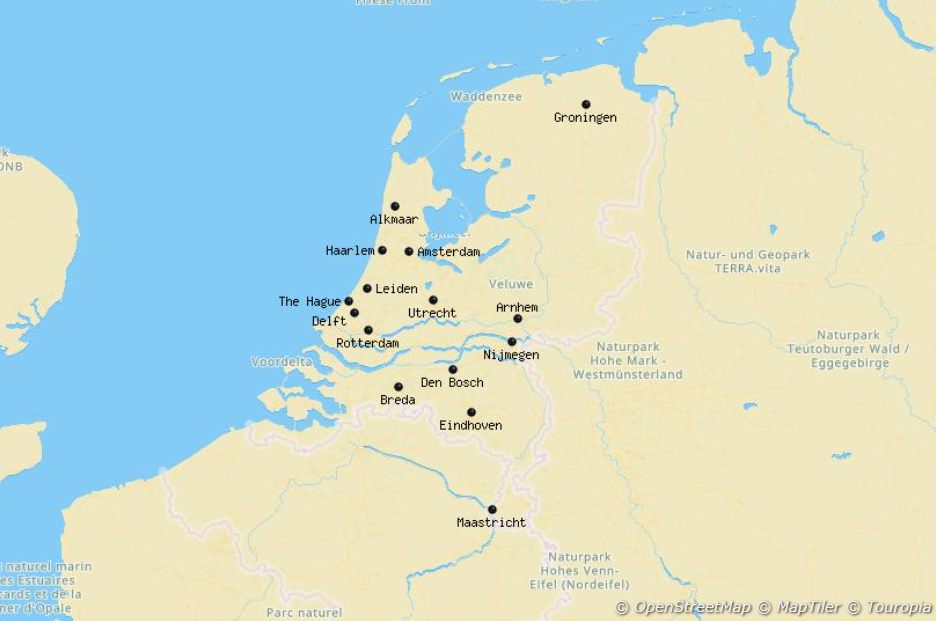

In [2]:
print ("Figure 1: Map of the 15 cities of Netherlands(touropia, 2021)")
from IPython.display import Image
Image ('Netherlands.png')

#### 1.2 Optimization Technique: 

What process can be used to find the optimal solution in your scenario? Identify and describe an existing algorithm that could be used to complete this process, including the inputs, outputs, required steps, and the termination condition. Explain the advantages and limitations of this algorithm. In your explanation, you should address whether your algorithm would lead to the global optimum and you may wish to compare your algorithm with other possible optimization techniques. (~200 words)

- *Optional*: Draw a flowchart to illustrate the process. 

- *Optional challenge*: Create a program in Python to implement this optimization process. Please provide a thorough explanation of how the code works, both holistically and using in-line comments. You must also provide at least one “test case” that demonstrates that your code is properly implemented. This test should be something like, “In this case, it's clear that the only possible solution is X; let's check that with our code. Yes, the code outputs X as well, so we can in principle induce that the implementation is correct."

To find the optimal solution, we will use **the genetic algorithm**. Genetic algorithms refer to finding the “best” outputs, meaning that we minimize the distance, which is our objective function by varying the input parameters. 

**The steps of the algorithm are as follows:**
1. Population initialization
2. Fitness Calculation
3. Selecting survivors
4. Performing crossover 
5. Performing mutations
6. Iterating and terminating

**Note:** We will develop these steps in the optional python code and elaborate on what they mean specifically, and visualize them in the flowchart.

**Advantages of the GAs include:**
 * It is faster and more efficient compared to traditional methods like using the hill-climbing algorithm because at this one, we might get stuck at a local minimum. 
 * It provides more good solutions and not just a single solution
 * It does not require any derivate information and is useful when dealing with many parameters.
 
**Limitations of the GAs include:**
 * The GA algorithm is not suited for all problems, and those problems derivate information is available.
 * The fitness value is calculated repeatedly, which might be computationally expensive for some problems.
 * There is no guarantee of the optimality or the quality of the solution because it is stochastic(randomly determined)

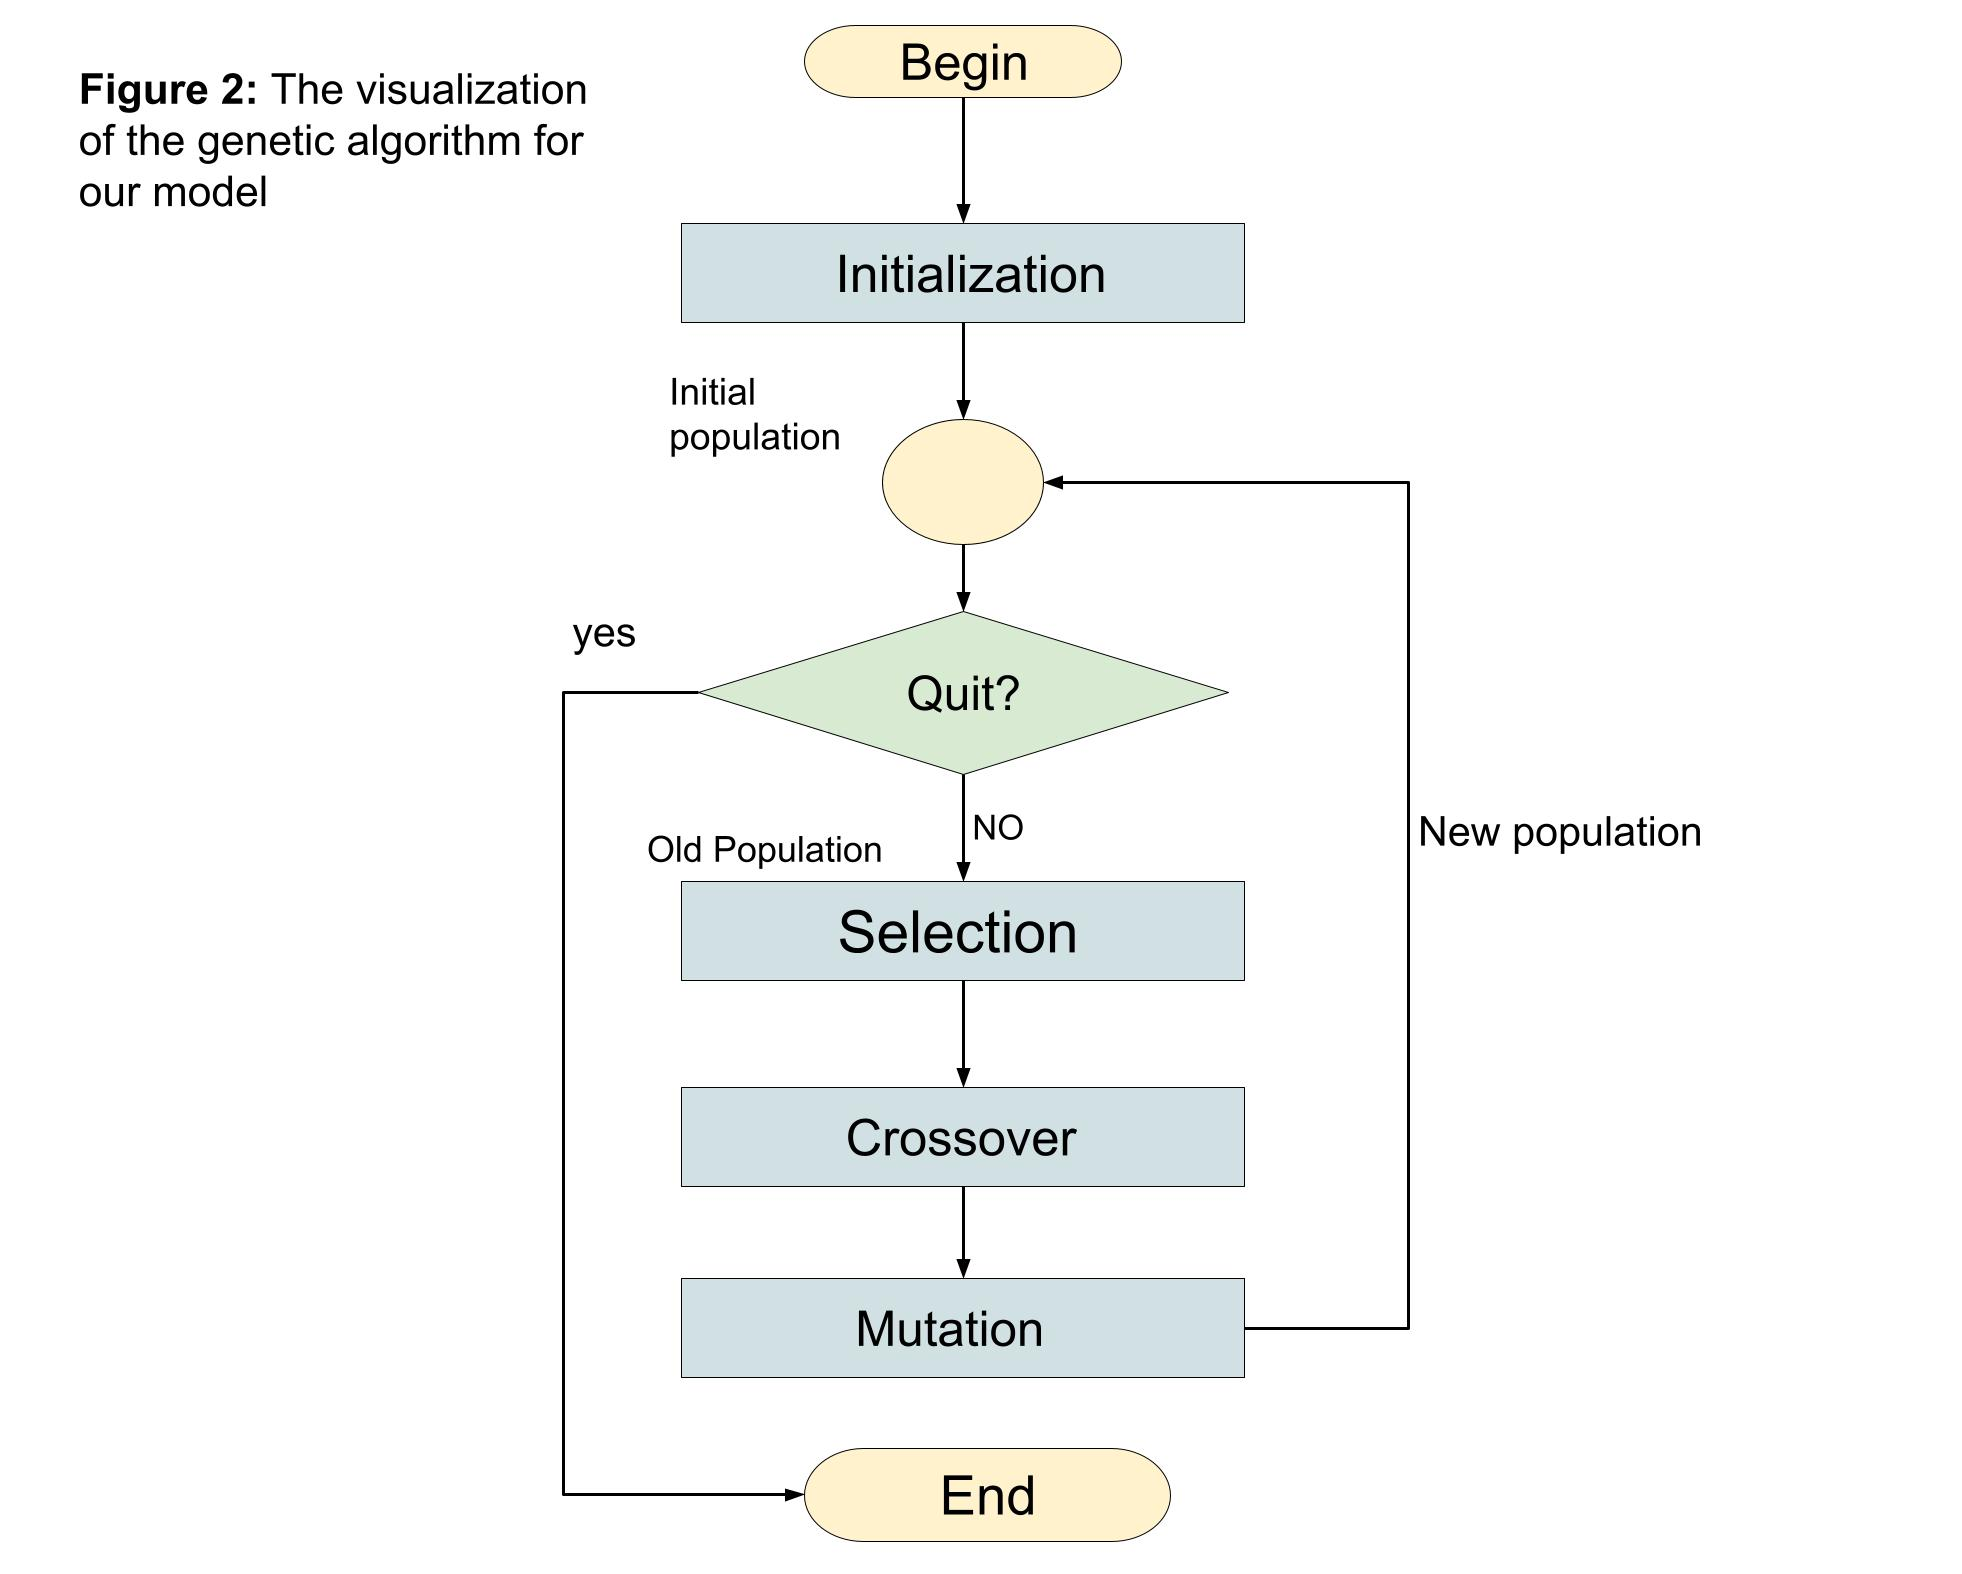

In [3]:
Image("flowchart.jpg")

In [4]:
#The code was taken from CS51 - Session 11. I added and editted additional code to fit my optimization problem.
#Cited on the reference section.

# Import the modules we use in this notebook
import matplotlib.pyplot as plt
import random
import numpy as np
import networkx as nx

# This generates a map of the cities
def generate_uniform_map(xmin = -100, xmax = 100, 
                     ymin = -100, ymax =100, 
                     cities_count = 10, plot = False, seed = 2021):
    np.random.seed(seed)
    xs = np.random.uniform(xmin, xmax, cities_count)
    ys = np.random.uniform(ymin, ymax, cities_count)

    if plot:
        plt.scatter(xs, ys, s = 200, c = 'darkmagenta')
        plt.xlabel('X coordinate of the city')
        plt.ylabel('Y coordinate of the city')
        plt.show()

    # Pairs each x and y
    coords = np.dstack((xs, ys))[0]
    cities = dict()
    list_cities = ('Groningen', "Alkmaar", "Amsterdam", "Arnhen" "Nijmegen", "Den Bosch", "Eindhoven", "Maastrich", "Breda", "Utrecht", "Rotterdam", "Delft", "Leiden", " The hague", "Harleem")

    for i in range(len(coords)-1):
        cities[list_cities[i]] = coords[i]

    return cities

# Initialize the population by generating random routes between the cities
def random_route(citylist):
    keys = list(citylist.keys())
    np.random.shuffle(keys)
    return keys
#this creates an initial population of routes depending on the population size - random rearrangement of routes
def initialize_routes(population_size, citylist):
    population = []
    for i in range(population_size):
        population.append(random_route(citylist))
    return population

Population initialization - we will use the random initialization method rather than heuristic initialization because we do not want a result that has similar solutions and very little diversity. Using a random initialization of genes to form chromosomes, function ensures to build a diverse population which will allow the next parts of the algorithm to explore to find global optimum, not to get stuck in a local optimum solution. 


In [5]:
# Get the length of the routes in our population so we can rank them from best to worst
def get_distance(citylist, indexi, indexj):
    city_a = citylist[indexi]
    city_b = citylist[indexj]
    x_dis = abs(city_a[0] - city_b[0])
    y_dis = abs(city_a[1] - city_b[1])
    distance = np.sqrt((x_dis ** 2) + (y_dis ** 2))
    return distance
#the fitness funtion, calculates the total distance for a give route
def get_route_length(citylist, route):
    total_dist = 0
    for index in range(len(route)):
        if index < len(route) - 1:
            dist = get_distance(citylist, route[index], route[index+1])
        else:
            dist = get_distance(citylist, route[index], route[0])
        total_dist += dist
    return total_dist
#sorts the routes in the population
def rank_routes(citylist, population):
    fitnessresults = []

    for index in range(len(population)):
        fitnessresults.append([index, get_route_length(citylist, population[index])])

    fitnessresults.sort(key=lambda x: x[1])
    return fitnessresults  

Fitness Calculation- we will define a function that will take a candidate solution to the problem as input and produce as an output on how “fit” the solution is, and it will be sufficiently fast to compute. 

In [6]:
#this function eliminates routes that are less efficient 
def get_crossover_pool(fitnessresults, population_size, survival_rate):
    cross_pool = []
    elite_amount = int(population_size * survival_rate)
    
    # We first place our direct survivors into the pool
    for route in fitnessresults[0:elite_amount]:
        cross_pool.append(route[0])

    return cross_pool

Selecting survivors - has the purpose of choosing the survivors in each generation, which mate and recombine to create off-springs for the next generation. It is important because good parents drive individuals to a fitter solution and it also maintains a good diversity. 

In [7]:
#this function implement the davis' OX1 crossover
def davis_crossover(parent1, parent2):
    num_cities = len(parent1)
    child_1 = []
    child_2 = []
    breakpoints = np.sort(np.random.choice(num_cities,2,replace=False))
    for i in range(breakpoints[0],breakpoints[1]):
        child_1.append(parent1[i])
        child_2.append(parent2[i])
    sortpoint = num_cities - breakpoints[0]
    j = breakpoints[1]
    while len(child_1) < num_cities:
        while parent2[j%num_cities] in child_1:
            j += 1
        child_1.append(parent2[j%num_cities])
    child_1 = child_1[sortpoint:] + child_1[:sortpoint]
    j = breakpoints[1]
    while len(child_2) < num_cities:
        while parent1[j%num_cities] in child_2:
            j += 1
        child_2.append(parent1[j%num_cities])
    child_2 = child_2[sortpoint:] + child_2[:sortpoint]
    return [child_1, child_2]

Performing crossover -  determines the number of individuals who should be created for the next generation. First, it replicates the survivors which we have, and later it permutates(shuffles) those genes to produce new chromosomes. It can be understood as a process of reproduction where the chromosomes of parents are mixed, and babies are formed. It makes a diverse population which enables the algorithm not to adhere to a local optimum but searches for the global optimum. 

In [8]:
# Obtain the children for the next generation by performing crossovers on the population
def population_crossover(population_size, population, cross_pool):
    children = []

    if len(cross_pool) % 2 != 0:
        cross_pool.pop()

    for routeindex in cross_pool:
        children.append(population[routeindex])

    while len(children) < population_size:
        sampleindex = np.random.choice(cross_pool, 2, replace = False)
        parent1 = population[sampleindex[0]]
        parent2 = population[sampleindex[1]] 
        children += davis_crossover(parent1, parent2)
    return children 

In [9]:
#this function perform the mutation step on a certain percentage of children
def mutate(route, mutation_rate, seed = 2021):
    for swapped in range(len(route)):
        if(np.random.random() < mutation_rate):
            swapwith = int(np.random.random() * len(route))
            route[swapped], route[swapwith] = route[swapwith], route[swapped]
            
    return route

def mutate_population(mutation_rate, children):
    mutated_routes = []

    for route in children:
        mutated_route = mutate(route, mutation_rate)
        mutated_routes.append(mutated_route)

    return mutated_routes

Performing mutations - The mutation's function is essential for a genetic algorithm. Even in real-life mutation is the source of all genetic variation. It creates new alleles, which didn't exist before in the population. It increases the efficiency of the algorithm and expands its scope to search for the best solution.

In [10]:
def visualize(citylist, population, fitnessresults):
    # Creating a graph
    graph = nx.Graph()
    # Adding nodes to the graph
    graph.add_nodes_from(citylist.keys())
    # Getting the current best route
    if fitnessresults:
        best_route = fitnessresults[0][0]
        # Adding the edges that correspond to the current best route
        for node_index in range(len(population[best_route]) - 1):
            graph.add_edge(str(population[best_route][node_index]), str(population[best_route][node_index+1]))
        graph.add_edge(str(population[best_route][-1]), str(population[best_route][0]))
    # Creating layout
    pos = {}
    plt.figure(figsize=(6.5,6.5))
    for node in citylist.keys():
        pos[node] = tuple(citylist[node])
    nx.drawing.nx_pylab.draw_networkx(graph,pos=pos,font_color='white',\
        font_weight='bold',font_size=11,node_color='darkmagenta',node_size=300)
    plt.show()

# The function below chooses what generations to display
# The routes change quickly at first, and then more slowly as the evolution progresses.
# Thus, this function chooses to look at generations that are closer together 
# earlier in the evolution, becoming more spaced out as we go along. 
def get_displays(n_displays, n_plots, n_generations):
    displayed_gens = [1+np.floor((n_generations-1)*(i/n_displays)**2) for i in range(0, n_displays+1)]
    displayed_plots = [1+np.floor((n_generations-1)*(i/n_plots)**2) for i in range(0, n_plots+1)]
    return displayed_gens, displayed_plots

In [11]:
# Define the hyperparameters of our genetic algorithm
cities_count = 15
population_size = 100
n_generations = 50
mutation_rate = 0.02
survival_rate = 0.08

Generation: 1
Best distance: 1002.743


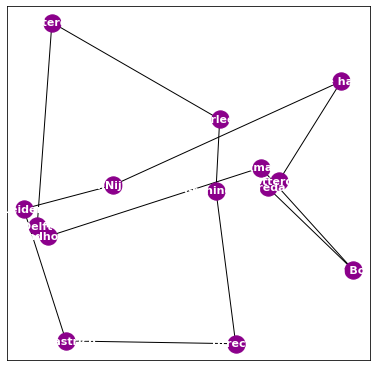

Generation: 6
Best distance: 818.775


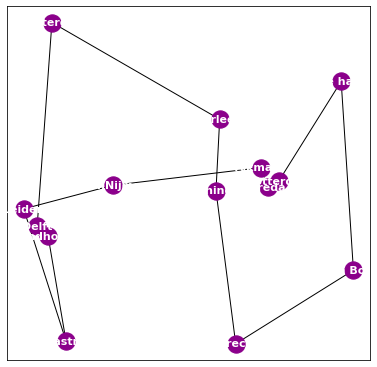

Generation: 22
Best distance: 782.303


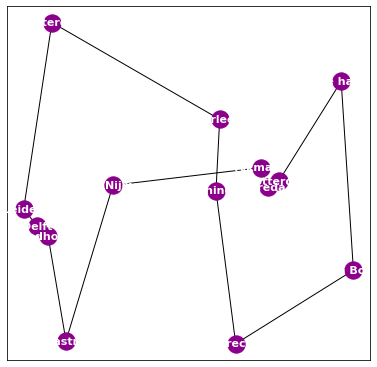

Generation: 50
Best distance: 782.303


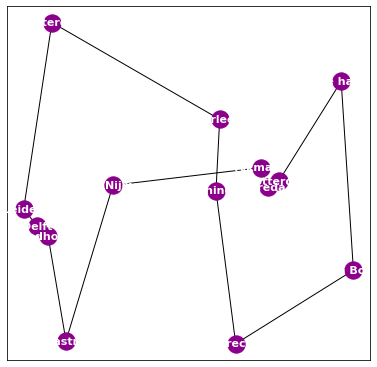

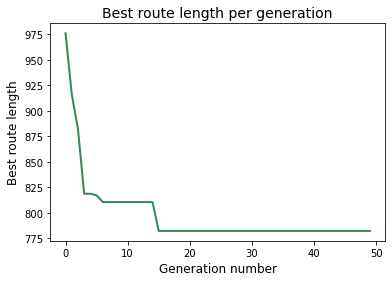

Best path in the final generation:
 ['Eindhoven', 'Delft', 'Leiden', 'Amsterdam', 'Harleem', 'Groningen', 'Utrecht', 'Den Bosch', ' The hague', 'Rotterdam', 'Breda', 'Alkmaar', 'ArnhenNijmegen', 'Maastrich'] 
Distance: 782.303


In [12]:
# Initialize the population
cities = generate_uniform_map(cities_count = cities_count, seed = 2021)
population = initialize_routes(population_size, cities)
fitnessresults = rank_routes(cities, population)

# Get generations to display
default_displays = 3
display = get_displays(default_displays,default_displays,n_generations)
fitness_evolution = np.zeros(n_generations)

# Main loop of the algorithm
for gen in range(1, n_generations+1):
    if gen in display[0]:
        print(f'Generation: {gen}\nBest distance: {str(round(fitnessresults[0][1],3))}')
    if gen in display[1]:
        visualize(cities, population, fitnessresults)
    cross_pool = get_crossover_pool(fitnessresults, population_size, survival_rate)
    if len(cross_pool)<2:
        print("Not enough parents to produce children!")
        print("For a population of size",population_size,", the survival rate must be at least",2/population_size)
        break
    else:
        children = population_crossover(population_size, population, cross_pool)
        population = mutate_population(mutation_rate, children)
        fitnessresults = rank_routes(cities, population)
        fitness_evolution[gen-1] = fitnessresults[0][1]

# plot to show fitness over the generations
if len(cross_pool)>=2:
    plt.plot(list(range(n_generations)),fitness_evolution,c = 'seagreen',linewidth=2)
    plt.title('Best route length per generation', fontsize = 14)
    plt.xlabel('Generation number', fontsize = 12)
    plt.ylabel('Best route length', fontsize = 12)
    plt.show()
    print("Best path in the final generation:\n",population[0],"\nDistance:",round(fitnessresults[0][1],3))

In [22]:
#The test case 
#To test our code, we will create a 4 cities 
#enclosed within a square where the optimal route would be to visit the cities 
#using the edges of the square where the distance of each edge 
#is 1m and each diagonal is sqrt(2) (going from a -> b -> c -> d  would be 3m)

test_cities_pos = [[0,0],[1,0],[0,-1],[1,-1]]
test_cities = ['a','b','c','d']

test_map = dict(zip(test_cities,test_cities_pos))
    
test_map

{'a': [0, 0], 'b': [1, 0], 'c': [0, -1], 'd': [1, -1]}

Generation: 1
Best distance: 4.0


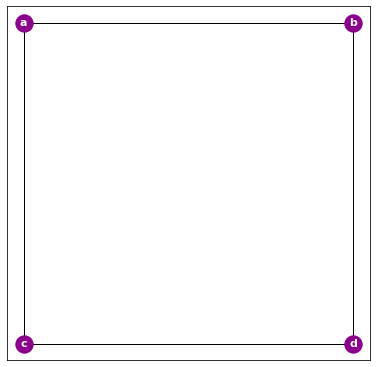

Generation: 6
Best distance: 4.0


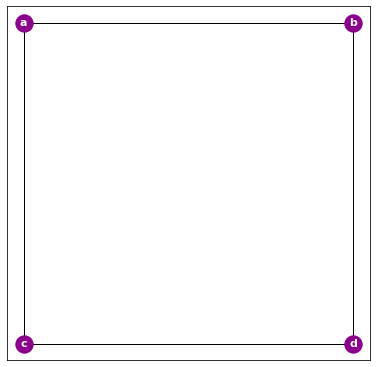

Generation: 22
Best distance: 4.0


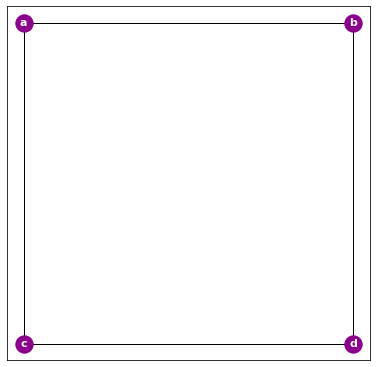

Generation: 50
Best distance: 4.0


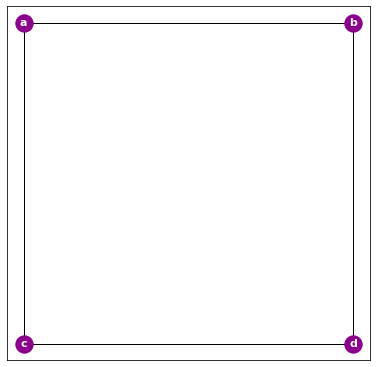

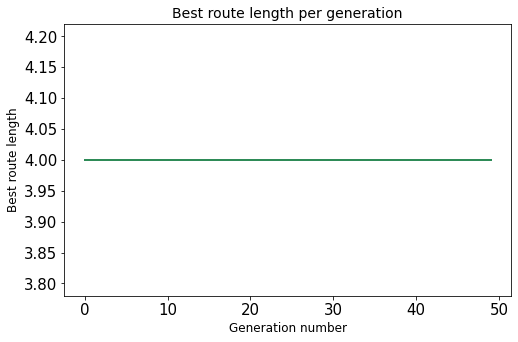

Best path in the final generation:
 ['c', 'd', 'b', 'a'] 
Distance: 4.0


In [23]:
population = initialize_routes(population_size, test_map)
fitnessresults = rank_routes(test_map, population)

# Get generations to display
default_displays = 3
display = get_displays(default_displays,default_displays,n_generations)
fitness_evolution = np.zeros(n_generations)

# Main loop of the algorithm
for gen in range(1, n_generations+1):
    if gen in display[0]:
        print(f'Generation: {gen}\nBest distance: {str(round(fitnessresults[0][1],3))}')
    if gen in display[1]:
        visualize(test_map, population, fitnessresults)
    cross_pool = get_crossover_pool(fitnessresults, population_size, survival_rate)
    if len(cross_pool)<2:
        print("Not enough parents to produce children!")
        print("For a population of size",population_size,", the survival rate must be at least",2/population_size)
        break
    else:
        children = population_crossover(population_size, population, cross_pool)
        population = mutate_population(mutation_rate, children)
        fitnessresults = rank_routes(test_map, population)
        fitness_evolution[gen-1] = fitnessresults[0][1]

# plot to show fitness over the generations
if len(cross_pool)>=2:
    plt.plot(list(range(n_generations)),fitness_evolution,c = 'seagreen',linewidth=2)
    plt.title('Best route length per generation', fontsize = 14)
    plt.xlabel('Generation number', fontsize = 12)
    plt.ylabel('Best route length', fontsize = 12)
    plt.show()
    print("Best path in the final generation:\n",population[0],"\nDistance:",round(fitnessresults[0][1],3))

## <font color='orange'> **PART 2**: SIMULATION</font>


The SIR model of the spread of disease is commonly used to help understand how a disease might move through a population. You were introduced to this with the NetLogo agent-based model in NS50 and will review it again in Weeks 7 and 8 of CS51. Check out the class readings to learn about this model. 


For this assignment, you will select one disease of your choice to model. Please choose a disease from [THIS LIST](https://docs.google.com/spreadsheets/d/1_p_6W8Zh07XFwuQ3EzkT7PEdbtwTzejHbpKm_wBOLas/edit?usp=sharing) to investigate.  If you would like to select your own disease to model, you may email your professor with the disease and parameter descriptions for approval. You must select an infectious disease (one that is transmitted from person to person through a viral, bacterial, or parasitic agent), not a genetic or environmental disease. 

### **Part 2.1 Numerical Modeling and Simulation**

For this part of the assignment, you’ll consider the SIR model described by the set of differential equations below, and the numerical simulation in Python via Euler’s method.

$$ \frac{dS}{dt} = -\frac{b}{N}S(t) I(t) $$
<br>
$$ \frac{dI}{dt} = \frac{b}{N}S(t)I(t) - kI(t) $$
<br>
$$ \frac{dR}{dt} = k I(t) $$
<br>

#### 2.1.1 Variables and Parameters (~250 words) [#variables] 

This section serves to set up an initial analysis of the SIR model. 
1. State the disease you selected to model.

2. Identify the relevant **variables** of the model, fully classify what type of variables they are, and explain what they mean in the context of your model. Next, identify appropriate numerical values and units for the **initial values** of the variables. You’re encouraged to use empirical data if possible to justify these values. You may also complete a well-reasoned #estimation for any values that are difficult to justify with empirical data. Include APA citations for any external sources used. Note that you can work with population values $S$, $I$, $R$, or proportions, $S/N$, $I/N$, $R/N$, as long as you are consistent.

3. Explain what the relevant **parameters** ($b$ and $k$) are and what they mean. For your model, identify and justify appropriate numerical values and units for $b$ and $k$. As above, you may include a well-reasoned estimate using empirical data to support your justification. Further, explain what it would mean for the parameters ($b$ and $k$) to be smaller or larger. Consider what real-world factors, in the context of the disease you selected, would reduce or increase these parameters.

4. *Optional*: Modify the basic SIR model to add a layer of real-world complexity. A few ideas are listed below. Explain the key features of the extended model, including the modified differential equations and a full description and classification of any new variables and parameters following the steps above.
  - Vaccination
  - Antibiotic use and/or development of antibiotic resistance
  - Variability in population susceptibility (e.g. children and the elderly have different rates of infection compared to young adults).
  - Birth and death rates in the population

Disease selected: **Covid-19**

| Variable    | Classification |Unit |Independence | Context | Intial Value |Justification | 
| :-----------: | :-----------:    | :-----------: |:---------:|:--------------:|:--------------:|:--------------:|
| **S = S(t)**    | Quantitative discrete(people are discrete, but on Euler’s method, we will think of them as continuous, and same applied for I, R, D, and N)|People | Dependent|the number of susceptible individuals on a given day|10,668,357|Calculated the total number of the Netherlands population minus the infected individuals(WorldOmeter, 2022). It should be greater than 0, and will never reach zero due to the lack of vaccination| 
| **I = I(t)**    |  Quantitative discrete           |People | Dependent|the number of infected individuals on a given day|6,771,643|Infected cases by Covid-19 in Netherlands(WorldOmeter, 2022)| 
| **R = R(t)**    |  Quantitative discrete |People | Dependent |the number of recovered individuals; the number of people who have been removed from the model on a given day|1,993,056|Recovered cases from Covid-19 in the Netherlands(WorldOmeter, 2022)| 
| **D = D(t)**    | Quantitative discrete|People | Dependent |The number of dead people in the model on a given day 0|0|We assume that there is no spread on the disease in the initial part and there is no one dying|
|**N**           |  Quantitative discrete|People | Dependent |The total population of the model|17440000|The population of Netherlands(WorldOmeter, 2022)|
| **t**           | Quantitative Continuous(we consider that we can have instances such as 1.5 days) | Days(in our case)| Independent |Time|50 days|We assume we want to see for 50 days the spread of the virus|

| Parameter    | Classification |Context        |Justification  | Initial Value | Justification  | Real word factors incluencing parameters |
|: -----------:|:--------------:|:--------------:|:-------------:| :------------:|:------------- :|:------------- :|
| **b**| Quantitative Continuous |Infection rate        |1/time(days)| 0.085|each infected individual infects 1 other person every 11.7 days | isolation, travel restriction, social distancing(contanct with the susceptible population) can decrease the infection rate |
|**k**   | Quantitative Continuous |Recovery rate      | 1/time(days)       |0.062 | It takes an infected individual person 16 days to move from the infected population to the recovered population(to recover from Covid-19)  |Effective vaccines can increase the recovery rate, new variants of the virus can decrease it |


Our variables are S, I, R, and D(optional challenge, N, and t. S, I, R, D, and N are classified as **discrete quantitative because people classify as discrete(individually separate and distinct)**. Our model is based on differential equations, which are composed of derivates(rate of change of a function concerning variables). Because of that, we assume that our variables are classified a**s quantitative continuous**, meaning it can take an infinite number of values(for example, time is quantitative continuous because it can have a value of 1.5 which means one day and a half). Our parameters are b(infection rate), k(recovery rate), and d(death rate) as our optional added value. They are quantitative continuous because they can take an infinite number of values.                              
**All the information of variables and parameters is in the table above.**

#### 2.1.2 Euler’s Method Description (~150 words) [#algorithms]

Explain what it means to solve the SIR differential equations and how Euler’s method works as an algorithm to achieve a numerical solution via simulation. In your explanation, identify the inputs, outputs, and steps that the algorithm takes, and consider the role of the step size (`h`) in the algorithm. 

For the numerical calculation of the spread of the Covid-19 disease, Euler’s method will take k(recovery rate), b(infection rate), and our initial conditions of S(t), I(t), R(t)  as inputs. Next, we specify the initial step size (h), i.e., the amount by which we increase our time values (t). We also set the number of point estimates we want to generate as the termination condition for the algorithm.

The solution to the SIR differential equation is the functions (S(t), I(t), R(t), which satisfy all three differential equations when the functions and their derivatives are substituted into the equations. To calculate the following approximate values of SIR from the initial values outputted in a given iteration, the algorithm executes the following equations:

 S(n+1) = S(n) + (h *  f(tn, Sn ) where f(tn,sn) = ds/dt                              
 I(n+1) = I(n) + (h * f(tn, In)   where f(tn, In) = dI/dt                             
 R(n+1) = R(n) + (h * f(tn, Rn) where f(tn Rn) = dr/dt                           
           
In the equations,  n represent the current iteration, and delta_t is a suitably small step size regarding the time. 
The algorithm runs or loops through the following equations in the specified range, producing a point estimate at each iteration. The algorithm breaks the loop and puts the outputs that will be an away of the approximate values of S, I, R at given times once the terminal condition is met.


#### 2.1.3 Euler’s Method Implementation [#algorithms, #dataviz]

Define a function that implements a numerical simulation to derive the implications of your model using Euler’s method in Python. Your simulation must generate at least one relevant visualization of the disease dynamics (see required analysis below), including a descriptive figure legend and caption. You may need to adjust the run-time and step size in your simulation to ensure the visualization is maximally informative. Include thorough comments in your code to convey your understanding of the implementation of Euler’s method. 

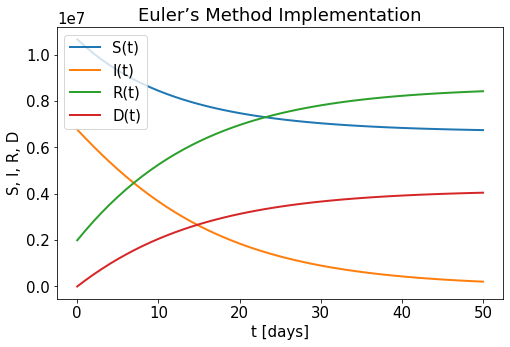

In [15]:
#The code was taken from CS51 - Session 12. I added and editted additional code to fit my optimization problem. 
#Cited on the reference section.
#optional: death rate variable


import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = [8,5]


def SIR_Euler(b,k, d, initial_conds):
    t0 = 0 # the initial value of time, meaning it will start at 0 days
    t_end = 50 # the final value of time, meaning it will end at 50 days

    h = 1 #the number of steps, or the amount that we will give to our time values
    steps = int((t_end - t0)/h + 1) # number of steps

    # variables:
    t = np.linspace(t0, t_end, steps) # storing t values
    S = np.zeros(steps) # for storing S values
    I = np.zeros(steps) # for storing I values
    R = np.zeros(steps) #for storinf R values
    D = np.zeros(steps)#for storing D values

    # initial conditions:
    S[0] = initial_conds[0] 
    I[0] = initial_conds[1] 
    R[0] = initial_conds[2] 
    D[0] = initial_conds[3] 
    N =  S[0] + I[0] + R[0] 
#this part implement the Euler's method using the formulas of S, I, R, and D
    for n in range(steps-1): # range(start, stop, step)
        S[n+1] = S[n] + (h * -((b/N) *(S[n] * I[n]))) 
        I[n+1] = I[n] + (h* ((b/N) * S[n] * I[n]) - (k * I[n]) - (d * I[n]))# FILL THIS IN!
        R[n+1] = R[n] + (h * (k * I[n]))
        D[n+1] = D[n] + (h * (d * I[n])) 
#make plots of the data
    plt.plot(t,S,linewidth=2,label='S(t)')
    plt.plot(t,I,linewidth=2,label='I(t)')
    plt.plot(t,R,linewidth=2,label='R(t)')
    plt.plot(t,D,linewidth=2,label='D(t)')
    plt.xlabel('t [days]')
    plt.ylabel('S, I, R, D')
    plt.title('Euler’s Method Implementation')
    plt.legend(loc='best')
    plt.show()

# parameters:
infection_rate = 0.085 #The intial values of the infection rate
recovery_rate =  0.062 #The intial values of the recovery rate
death_rate = 0.039 #The initial values of the death rate

# initial conditions: 
S0 = 10668357
I0 = 6771643
R0 = 1993056
D0 = 0
initial_vals = [S0,I0,R0,D0]

# call the function to run the simulation
SIR_Euler(b=infection_rate, k=recovery_rate, d= death_rate, initial_conds=initial_vals)

#### 2.1.4 Results and Interpretation (~250 words) [#modeling, #dataviz]

- Interpret the results of the numerical simulation by making reference the output in the visualization(s). To fully interpret the results, you should re-run the simulation above multiple times with varying parameter inputs ($b$ and $k$) and observe the behavior of your model. Include at least two additional visualizations here to support your answer. Does the behavior align with what you would expect these adjustments to have in reality (given your answer to 2.1.1.3 above)?  

- *Optional*: include at least one multidimensional phase space plot and provide a full interpretation of what it shows.

- Explain how useful this model is by considering the following guiding questions: What insights can be gained? How closely do the results match what you’d expect in reality? What are the most notable assumptions of this model and what impact do they have on its usefulness?


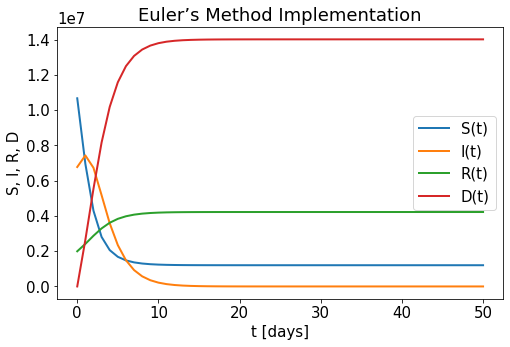

In [16]:
SIR_Euler(b=1, k= 0.062, d= 0.39, initial_conds=initial_vals) #increasing the b value while keeping k and d constant

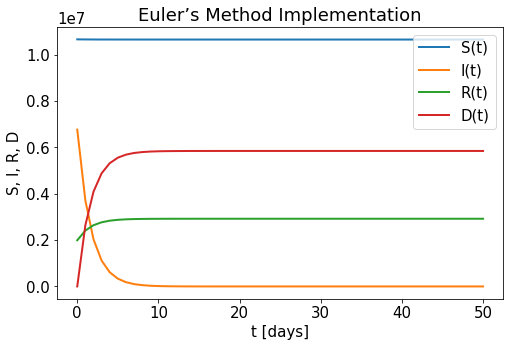

In [17]:
SIR_Euler(b=0.001, k= 0.062,d= 0.39, initial_conds=initial_vals) #decreasing b value while keeping k and d constant

SIR_Euler(b=1, k= 0.062, initial_conds=initial_vals)


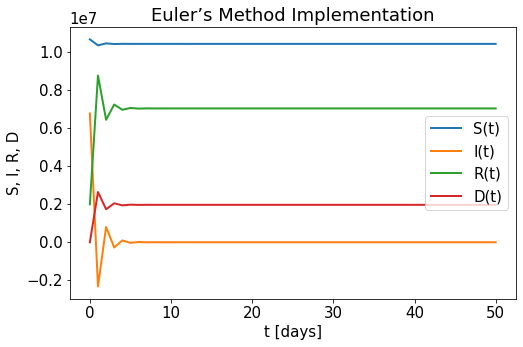

In [18]:
SIR_Euler(b=0.085, k=1, d= 0.39, initial_conds=initial_vals) #increasing k value while keeping b and d constant

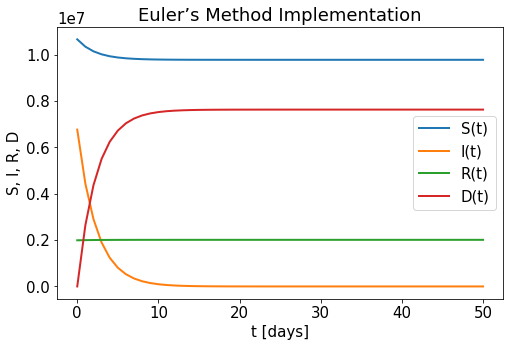

In [19]:
SIR_Euler(b=0.085, k= 0.001, d= 0.39,  initial_conds=initial_vals) #decreasing the k value while keeping d and b constant.

**Using the first initial values of b = 0.085 and k = 0.062, we can infer that:**                       
a)There is a slight decrease of the susceptible population, especially on the first 30 days when the virus is introduced. Then it reaches out to a constant. This can be because there is an exponential increase of the recovery rate approximately in the first 25-30 days.                                
b)An exponential decrease of the infected population is highly noticed till day 30, then it keeps a constant rate. This can happen because we have an increased recovery rate, meaning that most people that get infected quickly recover. 

**Increasing the infection rate(b) and keeping the recovery rate constant(b), we observe the following:**               
a)There is a strong decrease of the susceptible population and the infection rate around the first 10 days. This drop is probably due to the highly increased death rate in the population on the first 10 days, and then it reaches out a constant.   
b)The susceptible population does not reach out 0 even though it is low, and this constant is probably because there is also a slight increase in the recovery rate within the first 10 days, and it is kept constant.        

**Reducing the infection rate(b) and keeping the recovery rate constant(b), we observe the following:**                
a)There is a decrease of the infection rate on the first 5-7 days of the virus. Then it is 0, and this drop is probably due to the high increase of the death rate of the population and the slow increase of the recovery rate, which then is kept constant.                          
b)There is no increase or decrease in the susceptible population.                 

**Increasing the recovery rate(k) and keeping the infection rate(b) constant, we observe the following:**              
a)There is a high decrease in the infection rate of the population in the first 2 days of the virus, and this is because there is also the same increase on the recovery rate. Both of the parameters are constant after the first 5 days.           
b)There is a decrease in the susceptible population in the first 2 days, then it is kept constant.                

**Decreasing the recovery rate(k) and keeping the infection rate(b) constant we observe the following:**             
a)There is a high decrease of the infection rate on the first 10 days of the virus. This decrease can happen because of a high increase in the death rate and a constant low recovery rate.                            
b)The susceptible population decreases on the first day because of the high infection rate and is held constant.


### **Part 2.2 Agent-Based Modeling and Simulation (*OPTIONAL*)**

This part of the assignment is optional and will only be scored if completed effectively (score of 4 or 5). It is a valuable chance to compare the simulation above with the agent-based simulation implemented in [NetLogo](http://ccl.northwestern.edu/netlogo/models/Virus). 

Note about parameters: this model uses similar variables and parameters as the one above, but the parameters are not defined identically. In particular, the "Infectiousness" parameter in NetLogo is analogous to, but not equivalent to the infection rate in the SIR model. Thus, they should not be set to the same value in both of your simulations. The infection rate in the SIR model already incorporates the interaction rate of individuals, while the NetLogo simulation sets that rate separately. In other words, the "infectiousness" parameter in NetLogo only dictates the probability of infecting someone if they come close enough, but does not take into account how frequent those interactions occur. Be sure to investigate the meaning of the other parameters as well so that you understand how to set them appropriately.
<br>

#### 2.2.1 *Optional*: Simulation Comparison (~250 words) [#modeling]

After fully exploring the NetLogo model and running multiple simulations, summarize how it compares to your Python SIR simulation above. Aim to identify the main similarities, the major differences, and at least advantage for each one. Comment on which you believe to be a more realistic representation of nature, justifying your reasoning.



Even though our simulation and the NetLogo try to show the same thing, they use entirely different approaches.    

First, our simulation uses an overarching rule that determines what will happen while the NetLogo is an agent-based model where there is no overarching rule but based on the interactions of individual emergent properties are formed, where rules apply to each agent individually. The NetLogo is a stochastic model because some parameters are chosen randomly, e.g., in which direction the individuals will move. Our simulation is deterministic because there is no randomness, and with the same input, you will always get the same output. There can be confusion about changing the initial values and getting completely different. However, that happens just to the sensitivity to the initial condition. Still, there is no randomness included. 

It is hard to talk about the differences in results because the NetLogo model gives different results with the same input every time. The limitations to the Netlogo are that all the agents are uniform and the mutations are not included in the model. The Netlogo cares about the interactions between the agents, whereas the SIR model views the population as a whole.

Both of the models provide some useful insights for understanding real life. Based on the research question, you can determine which one is more useful, e.g., if you are interested in studying the interactions at a macro-level, then our simulation is more applicable. Still, for the microlevel, NetLogo provides many more insights. NetLogo seems more representative of nature because it considers more patterns over time; it helps you see more on how and why the virus is spread.

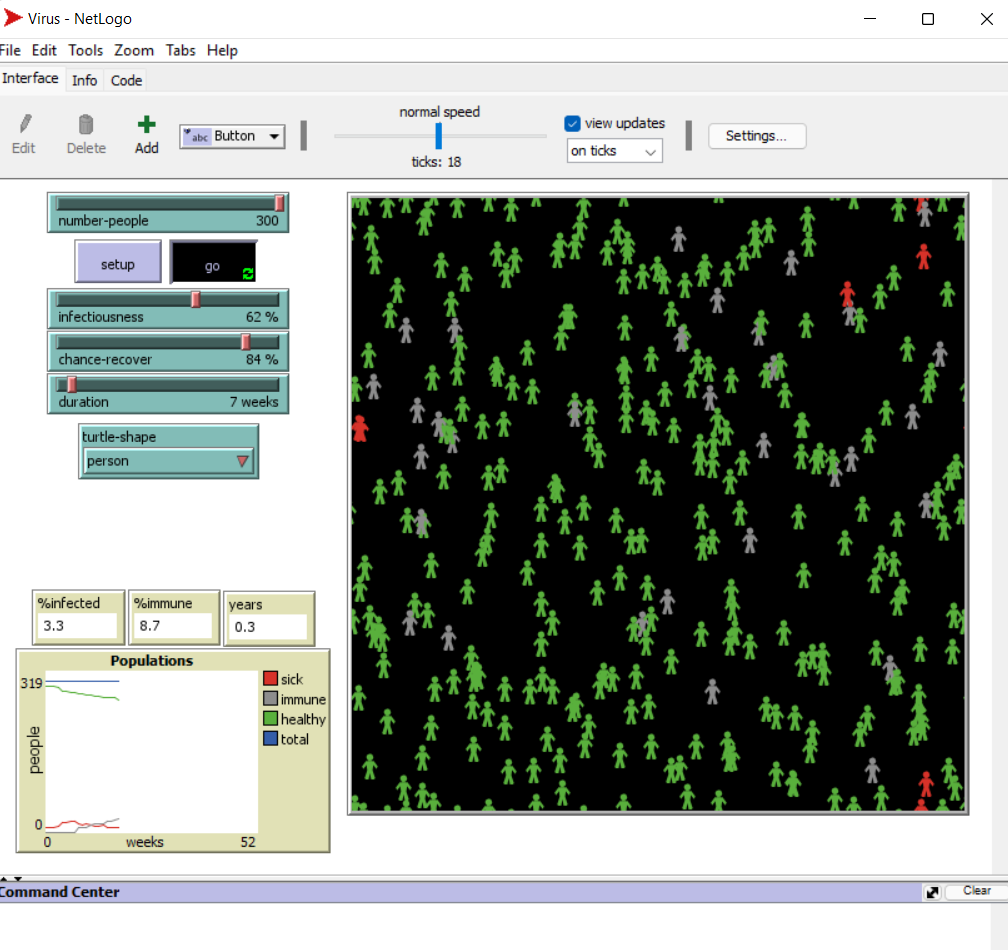

In [21]:
Image('netlogo.png')

#### 2.2.2 *Optional challenge*: Your own agent-based simulation [#algorithms, #modeling]:

Create your own agent-based simulation of the disease dynamics for your chosen disease in Python. You may add in real-world complexities as desired (vaccination, antibiotic use and/or development of antibiotic resistance, variability in population susceptibility). Your work needs to be explained in sufficient detail, including citations to any external sources consulted, in order to receive credit.

- One option: a tree graph can be useful in modeling person-to-person interactions. 

- Another option: turtles. 


## <font color='orange'>**REFLECTION**</font>

In less than 100 words, explain how this unit has enhanced your view of the power of modeling, algorithms, and simulations to describe the natural world around you. 

The knowledge obtained from classes and readings has been the most important skill to understand and complete this assignment. I recalled from the office hours and tutors tips regarding elaborating important information regarding the word count and acknowledging the importance of justifications of every input and output I got from the results. This assignment helped me understand real-life applications of algorithms to solve routing problems and imply the importance of stimulations in nowadays world concerns like the Covid-19 virus. 

## <font color='orange'>**REFERENCES**</font>


Netherlands. Worldometer. (n.d.). Retrieved March 13, 2022, from https://www.worldometers.info/coronavirus/country/netherlands/   

15 best cities to visit in the Netherlands. Touropia. (n.d.). Retrieved March 13, 2022, from https://www.touropia.com/best-cities-to-visit-in-the-netherlands/ 

Genetic Algorithm for the Traveling Salesman Problem. Forum. (n.d.). Retrieved from http://localhost:8888/notebooks/GA%20TSP%20Manual.ipynb 

SIR with Euler's Method. Forum. (n.d.). Retrieved from https://sle-collaboration.minervaproject.com/?url=https%3A//sle-authoring.minervaproject.com/api/v1/worksheets/0828827d-8217-453d-9683-3f92a4655adf/&amp;userId=11877&amp;name=Tanya+Bas&amp;avatar=https%3A//s3.amazonaws.com/picasso.fixtures/Tetiana_Bas_11877_2021-08-30T15%3A51%3A55.307Z&amp;isInstructor=0&amp;signature=abe4140d967306337d936f9a70d2f6d59b9940348cf2ca995334328be8417ccd 

The sir model for spread of disease - the differential equation model. The SIR Model for Spread of Disease - The Differential Equation Model | Mathematical Association of America. (n.d.). Retrieved March 13, 2022, from https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-the-differential-equation-model    

Genetic algorithms - introduction. (n.d.). Retrieved March 13, 2022, from https://www.tutorialspoint.com/genetic_algorithms/genetic_algorithms_introduction.htm               